<a href="https://colab.research.google.com/github/KKhushhalR2405/Gender-Flask/blob/master/svm_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
cd /content/drive/MyDrive/gender_flask

/content/drive/MyDrive/gender_flask


In [ ]:
data = np.load("/content/drive/MyDrive/gender_flask/dataset/data_pca50_y_mean.pickle.npz")

In [ ]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [ ]:
#arr0 = x_pca
#arr1 = target
#arr2 = mean

In [ ]:
x = data["arr_0"]
y=data["arr_1"]
mean = data["arr_2"]

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42) 

#y_train.shape

In [ ]:
from sklearn.svm import SVC
s = SVC(C=1.0,kernel="rbf",gamma=0.01,probability=True)


In [ ]:

try:
  s.fit(x_train,y_train)
  print("Model trained")
except:
  print("Error occured")

Model trained


In [ ]:
s.score(x_train,y_train)

0.9252651880424301

In [ ]:
s.score(x_test,y_test)

0.8923884514435696

Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = s.predict(x_test)
y_prob = s.predict_proba(x_test)

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[1219,  137, 1356],
       [ 150, 1161, 1311],
       [1369, 1298, 2667]])

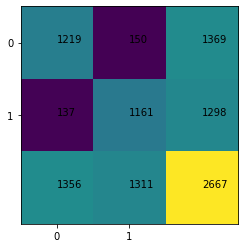

In [ ]:
plt.imshow(cm)
for i in range(3):
  for j in range(3):
    plt.text(i,j,cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

In [ ]:
#------------------##------------------#
#------------------##------------------#
#------------------##------------------#
#------------------##------------------#

In [ ]:
cr = metrics.classification_report(y_test,y_pred,target_names=["male","female"],output_dict=True)

pd.DataFrame(cr)

,male,female,accuracy,macro avg,weighted avg
precision,0.890431,0.894453,0.892388,0.892442,0.892408
recall,0.898968,0.885584,0.892388,0.892276,0.892388
f1-score,0.894679,0.889996,0.892388,0.892338,0.892377
support,1356.000000,1311.000000,0.892388,2667.000000,2667.000000


In [ ]:
metrics.cohen_kappa_score(y_test,y_pred)


0.7846801845480269

In [ ]:
#----HEHE HEHE---#

#kappa score = 0.78 (>50%)



HyperParameter Tuning  :P

In [1]:
from sklearn.svm import SVC


In [7]:
data = np.load("/content/drive/MyDrive/gender_flask/dataset/data_pca50_y_mean.pickle.npz")
x = data["arr_0"]
y=data["arr_1"]
mean = data["arr_2"]

In [17]:
model_tune = SVC()
param = {"C":[1,10,20,30,50,100],
         "kernel" : ["rbf","poly"],
         "gamma":[0.1,0.05,0.01,0.001,0.002,0.005],
         "coef0":[0],
         }

In [4]:
from sklearn.model_selection import GridSearchCV

In [19]:
model_grid = GridSearchCV(model_tune,param_grid=param,scoring="accuracy",cv=5,verbose=True)

In [20]:
model_grid.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 25.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=True)

In [21]:
model_grid.best_index_

22

In [22]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [23]:
model_grid.best_score_

0.9042635779137624

In [24]:
#----#
#Training the final model
#----#

In [25]:
final = SVC(C=30,coef0=0,gamma=0.005,kernel="rbf")

In [27]:
final.fit(x_train,y_train)
final.score(x_test,y_test)

0.9043869516310461

In [28]:
from sklearn import metrics

In [30]:
y_pred = final.predict(x_test)


In [31]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[1230,  126, 1356],
       [ 129, 1182, 1311],
       [1359, 1308, 2667]])

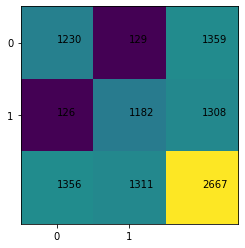

In [32]:
plt.imshow(cm)
for i in range(3):
  for j in range(3):
    plt.text(i,j,cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

In [33]:
cr = metrics.classification_report(y_test,y_pred,target_names=["male","female"],output_dict=True)

pd.DataFrame(cr)

,male,female,accuracy,macro avg,weighted avg
precision,0.905077,0.903670,0.904387,0.904373,0.904385
recall,0.907080,0.901602,0.904387,0.904341,0.904387
f1-score,0.906077,0.902635,0.904387,0.904356,0.904385
support,1356.000000,1311.000000,0.904387,2667.000000,2667.000000


In [34]:
metrics.cohen_kappa_score(y_test,y_pred)


0.8087121835390967

In [35]:
#final kappa score = 80%

#huehuehue

In [36]:
!pwd

/content


In [37]:
cd /content/drive/MyDrive/gender_flask

/content/drive/MyDrive/gender_flask


In [39]:
import pickle

In [41]:
pickle.dump(final,open("./dataset/finalmodel.pkl","wb"))

In [42]:
pickle.dump(mean,open("./dataset/ppmean.pkl","wb"))